In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

Prepare Data

In [4]:
test_dir = "./Processed_Split/Processed_Split/test/"
train_dir = "./Processed_Split/Processed_Split/train/"
val_dir = "./Processed_Split/Processed_Split/val/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, seed=42)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir, seed=42)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir, seed=42)
class_names = train_ds.class_names

Found 45828 files belonging to 50 classes.
Found 9504 files belonging to 50 classes.
Found 9438 files belonging to 50 classes.


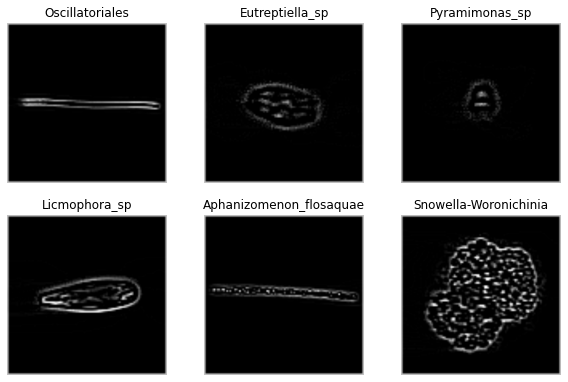

In [5]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Creating ResNet Model

In [10]:
resnet_model = Sequential()

trained_model = tf.keras.applications.ResNet50(include_top=False, pooling='avg', classes=50, weights='imagenet')
for layer in trained_model.layers:
        layer.trainable=False

resnet_model.add(trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(50, activation='softmax'))
resnet_model.summary()

resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 50)               25650     
 pper)                                                           
                                                                 
Total params: 24,662,450
Trainable params: 1,074,738
Non-trainable params: 23,587,712
__________________________________

In [11]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10, )


Epoch 1/10
1433/1433 [==============================] - 6957s 5s/step - loss: 0.4911 - accuracy: 0.8519 - val_loss: 0.3394 - val_accuracy: 0.8953
Epoch 2/10
1433/1433 [==============================] - 4854s 3s/step - loss: 0.2848 - accuracy: 0.9072 - val_loss: 0.3194 - val_accuracy: 0.8979
Epoch 3/10
1433/1433 [==============================] - 4860s 3s/step - loss: 0.2360 - accuracy: 0.9220 - val_loss: 0.2808 - val_accuracy: 0.9135
Epoch 4/10
1433/1433 [==============================] - 4856s 3s/step - loss: 0.2010 - accuracy: 0.9321 - val_loss: 0.2903 - val_accuracy: 0.9097
Epoch 5/10
1433/1433 [==============================] - 4856s 3s/step - loss: 0.1799 - accuracy: 0.9391 - val_loss: 0.2667 - val_accuracy: 0.9143
Epoch 6/10
1433/1433 [==============================] - 4866s 3s/step - loss: 0.1575 - accuracy: 0.9465 - val_loss: 0.2644 - val_accuracy: 0.9214
Epoch 7/10
1433/1433 [==============================] - 4842s 3s/step - loss: 0.1446 - accuracy: 0.9503 - val_loss: 0.2588 -

Model Accuracy Graph

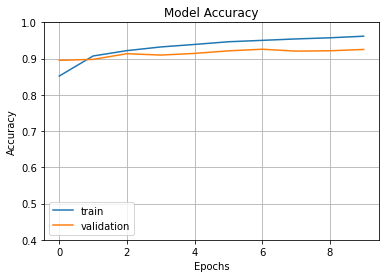

In [12]:
figures = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Loss Graph

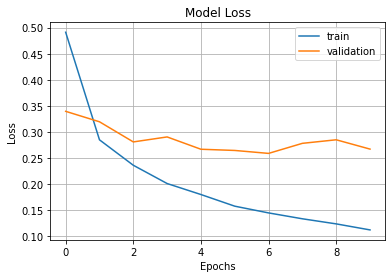

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions with Model

In [ ]:
prediction = resnet_model.predict(test_ds)
y_hat = np.argmax(prediction, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

In [21]:
print("Accuracy: ", accuracy_score(y_true, y_hat))
print("Precision: ", precision_score(y_true, y_hat, average='macro'))
print("Recall: ", recall_score(y_true, y_hat, average='macro'))
print("F1: ", f1_score(y_true, y_hat, average='macro'))
print(classification_report(y_true, y_hat, digits=4, target_names=sorted(os.listdir(test_dir))))

Accuracy:  0.0836489898989899
Precision:  0.01942905280771099
Recall:  0.01920607452601072
F1:  0.019273535113275692
                                    precision    recall  f1-score   support

                 Amylax_triacantha     0.0000    0.0000    0.0000         4
           Aphanizomenon_flosaquae     0.1149    0.1239    0.1193      1049
       Aphanothece_paralleliformis     0.0000    0.0000    0.0000         5
                             Beads     0.0000    0.0000    0.0000        20
                      Centrales_sp     0.0120    0.0139    0.0129        72
             Ceratoneis_closterium     0.0000    0.0000    0.0000         8
                    Chaetoceros_sp     0.0194    0.0192    0.0193       208
             Chaetoceros_sp_single     0.0000    0.0000    0.0000        33
                    Chlorococcales     0.0000    0.0000    0.0000        15
                     Chroococcales     0.0000    0.0000    0.0000        22
                 Chroococcus_small     0.0000 

c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,